**任务时间：题目1-3（11.05-11.10）
题目4、5（11.12-11.17）
题目6（11.19-11.25）**

**互评与筛选时间：题目1-3（11.11）
题目4、5（11.18）
题目6（11.26）**

每周只用提交相应的部分到自己的git，试题实行每周淘汰制

新互评链接：https://yiqixie.com/s/home/fcACT-kZRz10FXWBU2jXDt8VO

# 1、成功读取BTCUSDT:binance的数据，绘出30Min和1H的gap图

'start_date':20180601000000

In [1]:
#------------------1.读取BTCUSDT:binance的数据---------------------------

import warnings

warnings.filterwarnings('ignore')

In [2]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

###The West Texas Oil/US Dollar (WTICO/USD) pair
###US DOLLAR (USD) to China Offshore Spot (CNH) 
###Gold (XAU) to US DOLLAR (USD) 
start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': \
         'BTCUSDT:binance',
         'freq': '30Min,12H',
         # 测试时间周期 '1Min, 5Min, 15Min, 30Min, 1H, 4H, 6H, 8H, 12H, 1D'
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据


In [3]:
#调用模块
from jaqs_fxdayu.data.hf_dataview import HFDataView

dv30M = HFDataView()
dv1H = HFDataView()

In [64]:
#----------------------2.绘出30Min和1H的gap图-----------------------------

In [4]:
dv30M.create_init_dv(Time_dict['30Min'].dropna().set_index(["trade_date","symbol"]))
dv1H.create_init_dv(Time_dict['12H'].dropna().set_index(["trade_date","symbol"]))

Initialize dataview success.
Initialize dataview success.


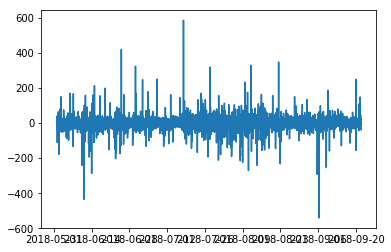

In [6]:
Gap1H = dv1H.add_formula('gap', 'close-Delay(open, 1)',add_data=True)
Gap30 = dv30M.add_formula('gap', 'close-Delay(open, 1)',add_data=True)

#观察价差
import matplotlib.pyplot as plt


plt.plot(dv30M.get_ts('gap', date_type='datetime')['BTCUSDT:binance'])
plt.show()

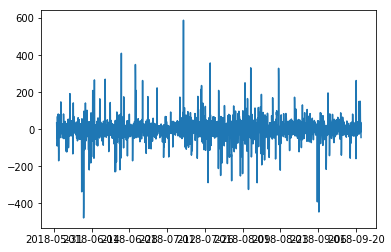

In [7]:
plt.plot(dv1H.get_ts('gap', date_type='datetime')['BTCUSDT:binance'])
plt.show()

# 2、调用alpha101research中的alpha10进行绘图，定义事件，打印绩效

要求：

1、绘出alpha10_dv30M_ma5_ma20、alpha10_dv1H_ma5_ma20的图。

2、定义alpha10的金叉死叉事件，周期为20和55，并打印出long_short的绩效

In [8]:
#--------1.绘出alpha10_dv30M_ma5_ma20、alpha10_dv1H_ma5_ma20的图--------
for dvAdd in [dv30M, dv1H]:
    dvAdd.add_formula('alpha10_C',
                      'If(Ts_Min(Delta(close,1),4)>0,Delta(close,1),If((Ts_Max(Delta(close,1),4)<0),Delta(close,1),(-1*Delta(close,1))))',add_data=True)

import matplotlib.pyplot as plt

def Plot_Mean(dv, alpha, chart_name='dv_alpha_ma', ShortPeriod=5, LongPeriod=20, n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(alpha.iloc[n:], alpha=0.1)
    ax1.plot(pd.Series(alpha.rolling(ShortPeriod).mean(), index=alpha.index).iloc[n:])
    ax1.plot(pd.Series(alpha.rolling(LongPeriod).mean(), index=alpha.index).iloc[n:])
#     plt.savefig(chart_name)
    plt.show()

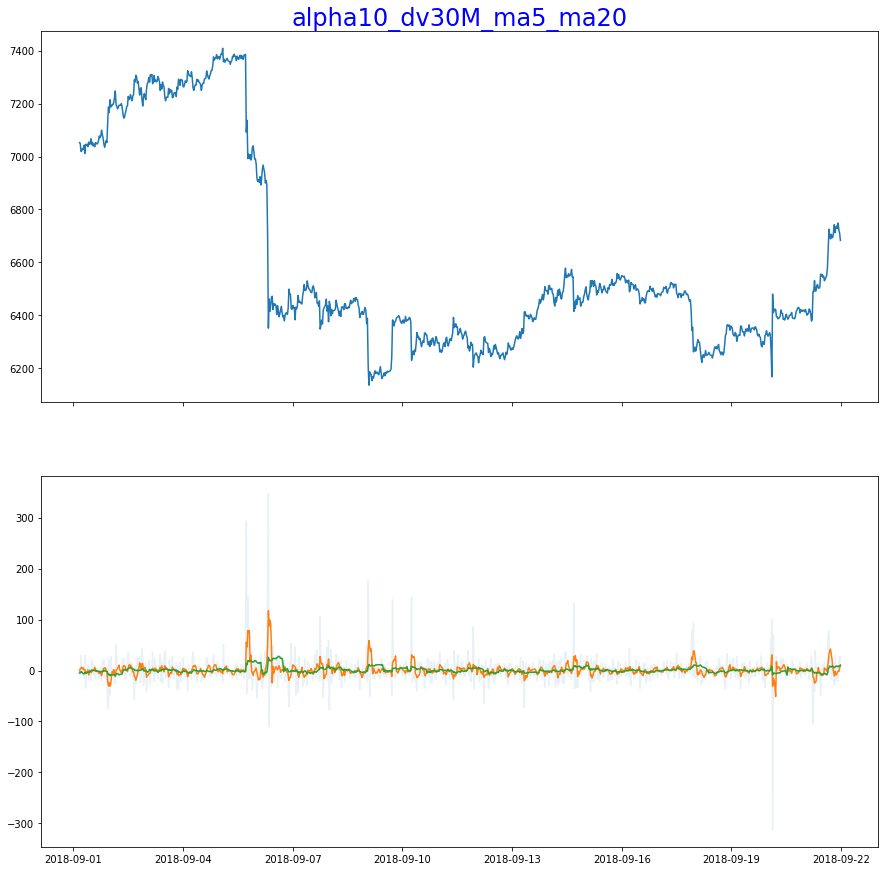

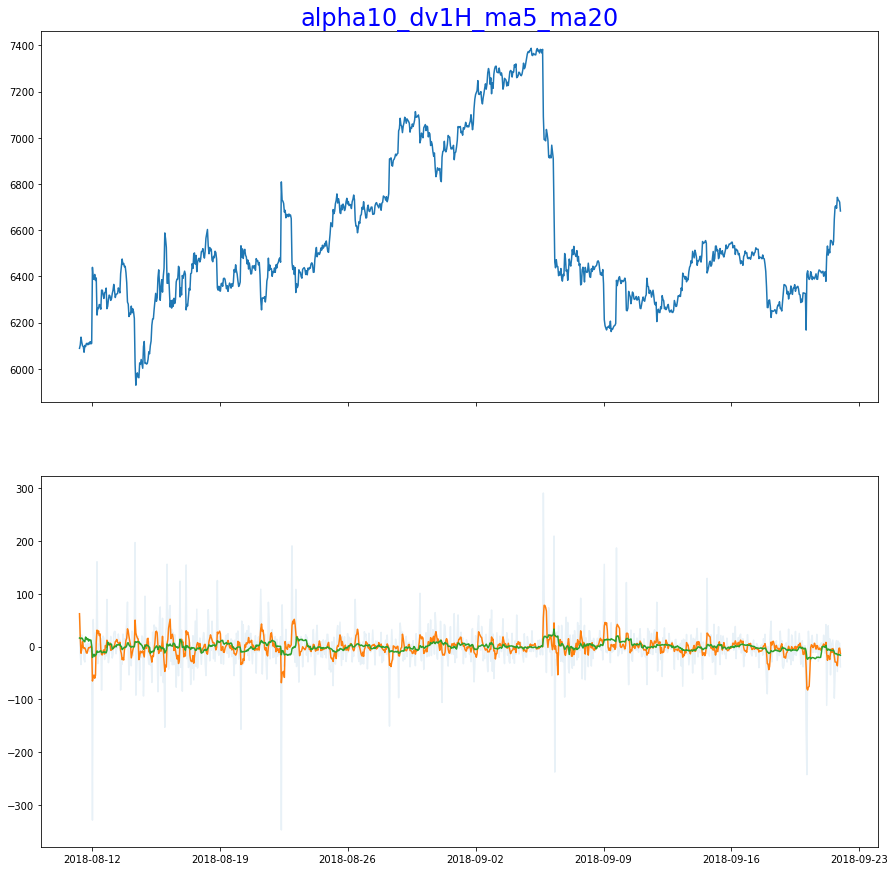

In [9]:
dv_dict = {'alpha10_dv30M':dv30M, 'alpha10_dv1H':dv1H}
alpha10_dict = {n: dv.get_ts('alpha10_C', date_type='datetime') for n, dv in dv_dict.items()}

import pandas as pd
#alpha1_dv15M是15分钟线，1H是1小时线，ma30和ma60代表对信号进行均线处理和观察是否与价格存在涨跌关系
# globals 函数返回一个全局变量的字典，包括所有导入的变量
#globals()['dv30M'] , type=jaqs_fxdayu.data.hf_dataview.HFDataView
for name, alpha in alpha10_dict.items():
    Plot_Mean(globals()[name.split('_')[1]], alpha.iloc[:,0], chart_name=name+'_ma5_ma20',ShortPeriod=5, LongPeriod=20, n=-1000)#橘色短线 绿色长线

In [11]:
#--------2、定义alpha10的金叉死叉事件，周期为20和55，并打印出long_short的绩效--------
# 进场信号
long = dv1H.add_formula("longAlpha10","If((Ts_Mean(alpha10_C,20)>Ts_Mean(alpha10_C,55)) && (Delay(Ts_Mean(alpha10_C,20),1)<=Delay(Ts_Mean(alpha10_C,55),1)),2,0)", add_data=True)
short = dv1H.add_formula("shortAlpha10","If((Ts_Mean(alpha10_C,20)<Ts_Mean(alpha10_C,55)) && (Delay(Ts_Mean(alpha10_C,20),1)>=Delay(Ts_Mean(alpha10_C,55),1)),-2,0)", add_data=True)

# 出场信号
close_long = dv1H.add_formula("closeLongAlpha10","If(shortAlpha10==-2,1,0)", add_data=True)
close_short = dv1H.add_formula("closeShortAlpha10","If(longAlpha10==2,-1,0)", add_data=True)

dv1H.get_ts('longAlpha10').stack()[dv1H.get_ts('longAlpha10').stack()==2].tail()

Field [longAlpha10] is overwritten.
Field [shortAlpha10] is overwritten.
Field [closeLongAlpha10] is overwritten.
Field [closeShortAlpha10] is overwritten.


trade_date      symbol         
20180919050000  BTCUSDT:binance    2.0
20180919080000  BTCUSDT:binance    2.0
20180919110000  BTCUSDT:binance    2.0
20180919160000  BTCUSDT:binance    2.0
20180920230000  BTCUSDT:binance    2.0
dtype: float64

In [16]:
#通过测试报告，看多空信号的绩效，这里是定义报告格式
from jaqs_fxdayu.research import TimingDigger

def TimingSignal(td, dv, long='long', short='short', closeLong='closeLong', closeShort='closeShort', mhp=None, sl=None, sp=None):
    
    td.process_signal(
        sig_type='long',
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        price=dv.get_ts('close'),
        max_holding_period=mhp,
        stoploss=-sl,
        stopprofit=sp
    )
    
    td.process_signal(
        sig_type='short',
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        price=dv.get_ts('close'),
        max_holding_period=mhp,
        stoploss=-sl,
        stopprofit=sp
    )

tdAlpha10 = TimingDigger(output_folder='.', output_format='pdf', signal_name='Alpha010')
TimingSignal(tdAlpha10, dv1H, 'longAlpha10', 'shortAlpha10', 'closeLongAlpha10', 'closeShortAlpha10', mhp=100, sl=0.05, sp=0.3)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 6%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 6%


In [17]:
#(sig_type="long_short")
tdAlpha10.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                        win     loss      all
t-stat                8.290   -9.095   -0.145
p-value               0.000    0.000    0.885
mean                  0.011   -0.011   -0.000
std                   0.016    0.015    0.019
info_ratio            0.677   -0.738   -0.008
skewness              3.664   -1.974    0.697
kurtosis             17.554    2.909    8.470
pct5                  0.001   -0.049   -0.032
pct25                 0.002   -0.012   -0.005
pct50                 0.005   -0.005   -0.000
pct75                 0.012   -0.002    0.005
pct95                 0.041   -0.001    0.027
occurance           151.000  153.000  304.000
win_ratio               NaN      NaN    0.497
win_mean/loss_mean      NaN      NaN    0.984


# 3、打印出Morningstar事件的时间点，绘出Morningstar与成交量的图

数据类型要求：'symbol': 'BTCUSDT:binance',

'freq': '1H','start_date':20180601000000

In [1]:
import warnings
warnings.filterwarnings('ignore')

from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
from matplotlib.pylab import date2num
## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props)

data1H = Time_dict.set_index('datetime')

data1H['candleTime'] = list(map(date2num, data1H.index))

candle = data1H.reindex_axis(["candleTime", "open", "high", "low", "close"], 1).values

In [ ]:
data1H = Time_dict.set_index('datetime')

from jaqs_fxdayu.data.hf_dataview import HFDataView

dv1H = HFDataView()

dv1H.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

In [5]:
#--------1.打印出Morningstar事件的时间点--------
import matplotlib.pyplot as plt
import mpl_finance as mpf
import talib as ta
import numpy as np
import pandas as pd

def draw_candle(candle, scatterX, scatterY):
    fig, (ax, ax1) = plt.subplots(2,1,sharex=True, figsize=(18,10))
    ax.grid(True)
    mpf.candlestick_ohlc(ax, candle, width=0.3, colorup='r', colordown='g',alpha=1.0)
    ax.scatter(scatterX, scatterY, color='b', s=100, marker='^')
    ax.xaxis_date ()
    ax1.bar(data1H.index, data1H.volume)
    plt.show()

morningstar = dv1H.add_formula('morningstar', "If((Ta('CDLMORNINGSTAR', 0, open, high, low, close, volume)==100),100,0)", add_data=True)
morningstarVolume = dv1H.get_ts('morningstar', date_type='datetime')
morningstarVolume[morningstarVolume['BTCUSDT:binance']==100]

symbol,BTCUSDT:binance
trade_date,
2018-06-15 22:00:00,100.0
2018-07-12 11:00:00,100.0
2018-07-19 06:00:00,100.0
2018-08-09 17:00:00,100.0
2018-08-31 04:00:00,100.0
2018-09-11 02:00:00,100.0
2018-09-18 01:00:00,100.0
2018-09-19 09:00:00,100.0


In [6]:
#--------2、绘出Morningstar与成交量的图--------
import matplotlib.pyplot as plt
import mpl_finance as mpf

def draw_candle(candle, scatterX, scatterY):
    fig, (ax, ax1) = plt.subplots(2,1,sharex=True, figsize=(18,10))
    ax.grid(True)
    mpf.candlestick_ohlc(ax, candle, width=0.3, colorup='r', colordown='g',alpha=1.0)
    ax.scatter(scatterX, scatterY, color='b', s=100, marker='^')
    ax.xaxis_date ()
    ax1.bar(data1H.index, data1H.volume)
    plt.show()

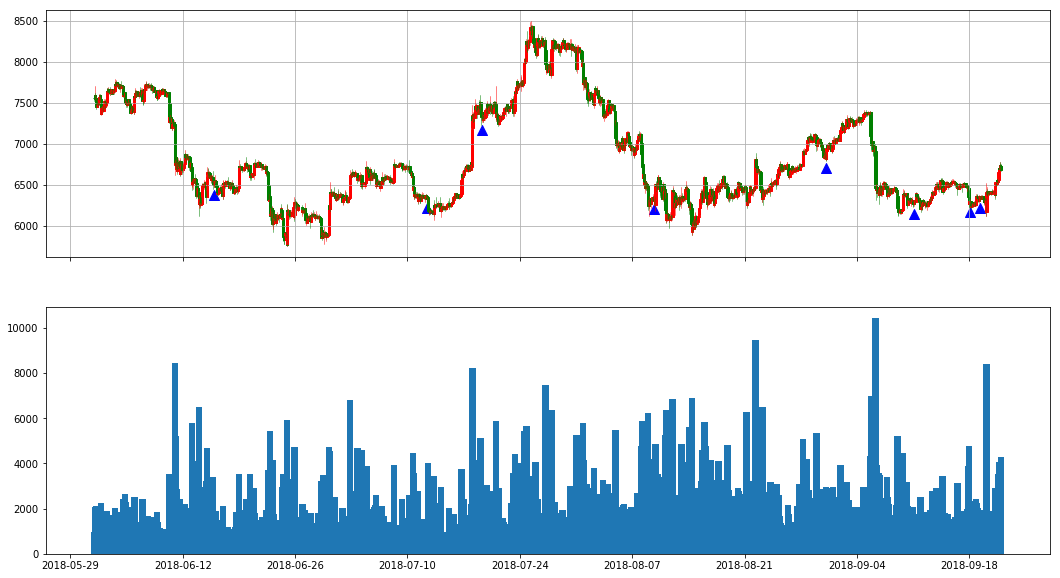

In [7]:
morningstarVolumeX = morningstarVolume[morningstarVolume['BTCUSDT:binance']==100].index

morningstarVolumeY = data1H.loc[morningstarVolumeX].low-100
draw_candle(candle, morningstarVolumeX, morningstarVolumeY)

# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）


https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定


In [5]:
import warnings
from jaqs_fxdayu.data.dataservice import LocalDataService
warnings.filterwarnings('ignore')
ds = LocalDataService()

## 加freq参数
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'BTCUSDT:binance',
         'freq': '12H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据

data1H = Time_dict.set_index('datetime')

import matplotlib.pyplot as plt
import pandas as pd


In [6]:
#-----------------------1. ：MACD-----------------------------------

from jaqs_fxdayu.data.hf_dataview import HFDataView

dv1H = HFDataView()
dv1H.create_init_dv(Time_dict.dropna().set_index(["trade_date","symbol"]))

dv1H.add_formula('Diff_J',
                   "Ta('EMA',0,0,0,0,close,0,12)-Ta('EMA',0,0,0,0,close,0,26)",
                   add_data=True)#,is_quarterly=False)
dv1H.add_formula('Dea_J',"Ta('EMA',0,0,0,0,Diff_J,0,9)",
                   add_data=True)#,is_quarterly=False)
dv1H.add_formula('Hist', "2*(Diff_J-Dea_J)", add_data = True)
MACD_J = dv1H.add_formula('MACD_J',"(Diff_J-Dea_J)*2",add_data=True)#,is_quarterly=False)

Initialize dataview success.


In [3]:
def Plot_Macd(dv, MACD, Diff, Dea, Hist, chart_name='MACD', n=-1500):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    
    ax.set_title(chart_name,fontsize=24,color='b') 
    
    ax1.plot(MACD.iloc[n:], alpha=1)
    ax1.plot(Diff.iloc[n:],color = 'g', alpha=0.4)
    ax1.plot(Dea.iloc[n:],color = 'orange', alpha=0.4)
    ax1.hlines(0, MACD.iloc[n:].index[0], MACD.iloc[n:].index[-1], linestyle='--')
    ax1.bar(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:].index ,
            Hist.iloc[n:],color='r',width = 0.01)
    # plt.savefig(chart_name)
    plt.show()

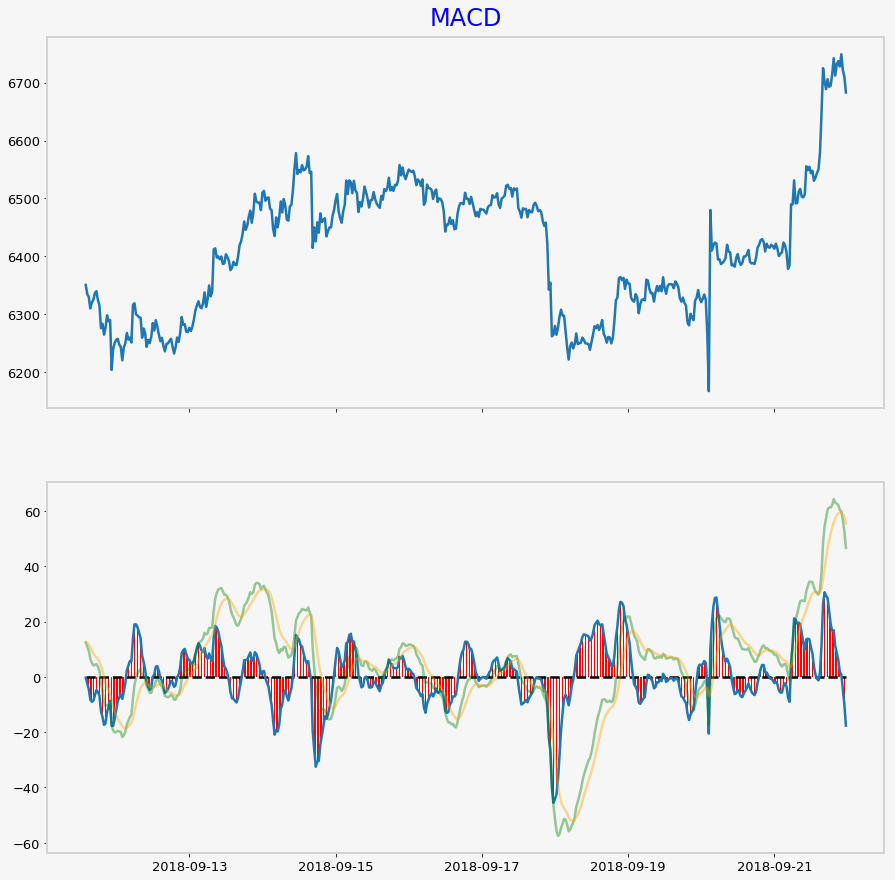

In [48]:
# 因子描述：平滑异同移动平均线(Moving Average Convergence Divergence) , 又称移动平均聚散指标。

# 1. DIFF (Difference)为收盘价短期长期指数平滑移动平均线间的差: DIFF = EMA(close, 12) - EMA(close, 26)。
# 2. DEA为(Difference Exponential Average) DIFF的M日指数移动平均： DEA= EMA(DIFF, M) , 通常M = 9。
# 3. MACO为DIFF和DEA之差，按照国内的处理标准，最终结果乘以2

MACD = dv1H.get_ts('MACD_J', date_type='datetime')
Diff = dv1H.get_ts('Diff_J', date_type='datetime')
Dea = dv1H.get_ts('Dea_J', date_type='datetime')
Hist = dv1H.get_ts('Hist',date_type = 'datetime')

# MACD蓝线
# Diff绿线
# Dea黄线
# Hist红柱
Plot_Macd(dv1H, MACD.iloc[:,0],Diff.iloc[:,0], Dea.iloc[:,0],Hist.iloc[:,0], n=-500)

In [7]:
#------------------- ------2.Stoch RSI ----------------------

# /*
# LC : REF(CLOSE,1); //REF(C,1) 上一周期的收盘价
# RSI: SMA(MAX(CLOSE-LC,0),N,1)/SMA(ABS(CLOSE-LC),N,1) *100;
# ％K: MA(RSI-LLV(RSI,M),P1)/MA(HHV(RSI,M)-LLV(RSI,M),P1)*100;  LLV（l,60）表示：检索60天内的最低价，可适应于检索任何股票
# ％D: MA(％K,P2);

# LC := REF(CLOSE,1);
# RSI:=SMA(MAX(CLOSE-LC,0),N,1)/SMA(ABS(CLOSE-LC),N,1) *100;
# STOCHRSI:MA(RSI-LLV(RSI,M),P1)/MA(HHV(RSI,M)-LLV(RSI,M),P1)*100;
# */

# %K === STOCHRSI ， %D === MA(3)

dv1H.add_formula('RSI', "Ta('RSI',0,0,0,0,close,0,24)", add_data = True)

def STOCHRSI(RSI,T=14,tK=3):
    lowRSI = RSI.rolling(window=14).min()
    highRSI = RSI.rolling(14).max() 
    StochRSI = 100 * (RSI - lowRSI).rolling(3).mean()/(highRSI - lowRSI).rolling(3).mean()
    return StochRSI
    
StochRSI_K = STOCHRSI(dv1H.get_ts('RSI').dropna(),T=14,tK=3).dropna() 
dv1H.append_df(StochRSI_K,'StochRSI_K')
dv1H.add_formula('StochRSI_D','Ts_Mean(StochRSI_K,3)', add_data=True)

# 一个单独RSI
# 一个多因子组合
# 怎么优化参数

symbol,BTCUSDT:binance
trade_date,
20180601000000,NaN
20180601120000,NaN
20180602000000,NaN
20180602120000,NaN
20180603000000,NaN
20180603120000,NaN
20180604000000,NaN
20180604120000,NaN
20180605000000,NaN


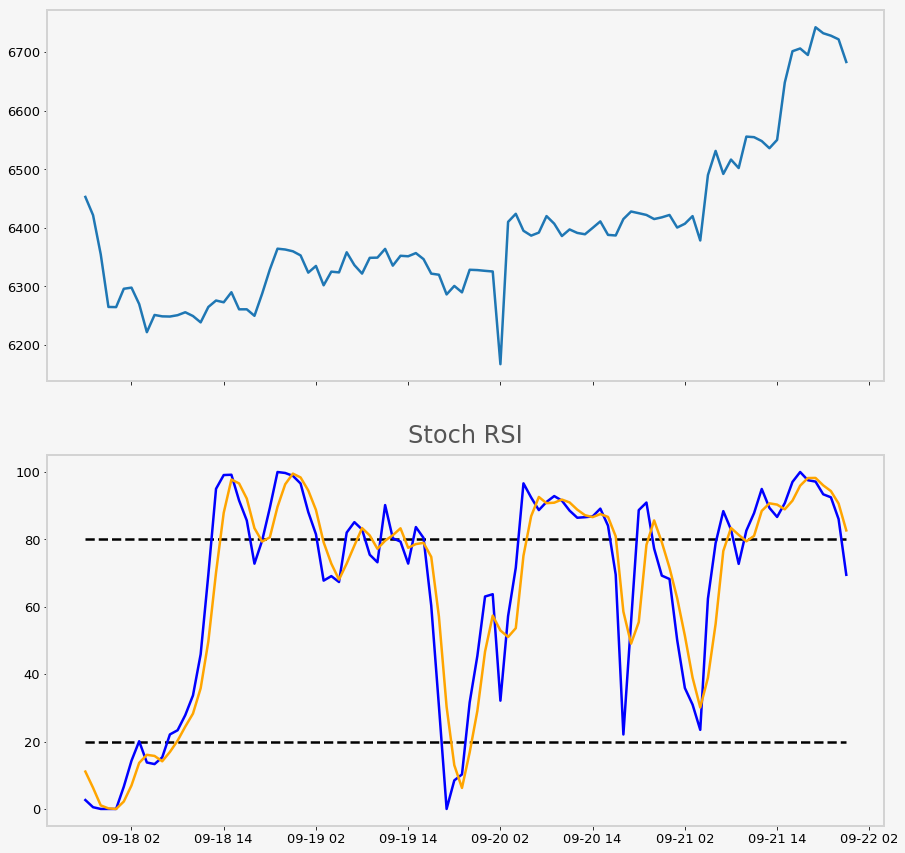

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

start=-100

def Plot_STOCHRSI(dv, StochRSI_K, StochRSI_D, chart_name='Stoch RSI', n=-10):
    fig, (ax1,ax) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax1.plot(dv.get_ts('close', date_type='datetime').iloc[start:,0].iloc[start:])
    ax.set_title(chart_name,fontsize=24) 
    
    ax.plot(StochRSI_K,label = "StochRSI_fastk", color='b')
    ax.plot(StochRSI_D,label = "StochRSI_fastd", color='orange')
    plt.hlines(80, StochRSI_K.index[0], StochRSI_D.index[-1], linestyles='--')
    plt.hlines(20, StochRSI_K.index[0], StochRSI_D.index[-1], linestyles='--')
    ax.xaxis_date()
    plt.show()
    
StochRSI_K = dv1H.get_ts('StochRSI_K',date_type='datetime')
StochRSI_D = dv1H.get_ts('StochRSI_D',date_type='datetime')
Plot_STOCHRSI(dv1H, StochRSI_K.iloc[start:,0], StochRSI_D.iloc[start:,0])

思考：
- MACD可以稍滞后较准确的反应市场趋势
- stochRSI可以叫迅速的预测涨跌
- 两个因子都是传统的技术因子
- 考虑到比特币这一市场近年来新人涌入多，充满不确定性和非理性因素，市场信息流通不完全透明，因此确定了在量价因子方面选择，以期待较准确地市场数据；在其中，保守的从两个方面选取了传统的因子，并考虑多因子组合预测市场以期待更高的准确率

# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么

# MACD
$$EMA_{t}= \alpha Price_{t} +...+\alpha \ast (1-\alpha )^{t-2} \ast Price_{2} +\alpha \ast (1-\alpha )^{t-1} \ast EMA_{1} $$

$$DIFF= (\alpha_{1} -\alpha_{2} )Price_{t} +...+(\alpha_{1} \ast (1-\alpha_{1} )^{t-2} -\alpha_{2} \ast (1-\alpha_{2} )^{t-2} )\ast Price_{2} +(\alpha_{1} \ast (1-\alpha_{1} )^{t-1} -\alpha_{2} \ast (1-\alpha_{2} )^{t-1} ) \ast EMA_{1} $$

根据经验就技术指标来说，MACD是准确率最高稳定性最好的，但是由公式也可以看出其存在显而易见的缺点：有一定的滞后性。

MACD指标由两线一柱一轴组成：分别是快速线DIF（绿线），慢速线DEA（黄线），MACD柱状线（红绿柱），以及红绿柱的分隔轴（0轴线），默认参数设置是12，26，9。
两线的交叉可以反应市场的变化，而柱形的长短变化则反映了趋势强度的微妙变化，且不管用哪个级别的分钟图，红绿柱的连续出现次数，绝大多数情况下不会超过四次。

MACD指标的核心策略：
1. 当DEA由下向上突破DIF，形成黄金交叉(金叉)，既白线上穿黄线形成交叉，为买入信号(作多)。
- 当DEA由上向下突破DIF，形成死亡交叉(死叉)，既白线下穿黄线形成交叉，为卖出信号(做空)。
3. MACD柱形图，由红柱变绿柱时往往指示为卖出信号(做空)，反之往往为买入信号(做多)。
4. MACD柱形图，绿柱缩短，为买入信号（做多），反之为卖出信号（做空）。



# stoch RSI



随机相对强弱指标即Stochastic Relative Strength Index（Stoch RSI）是基于相对强弱指标RSI（Relative Strength Index）演变而来的一个技术分析指标。它由2种常见的技术指标随机指标KDJ（又称Stochastics Oscillator）和相对强弱指标RSI构成，它在KDJ指标内嵌套RSI指标。
$$RSI = 100-100/(1+RS)$$
               $其中 RS = n日内收盘涨幅合计/n日内收盘跌幅合计$

RSI指标的优势在于及时反馈市场短期的底部和顶部，但RSI短期波段幅度有限，不能经常到达超买超买区间的水平；KDJ指标灵敏度高，短期却有太多短期波动，二者结合起来便派生了Stoch RSI指标。
![](https://5b0988e595225.cdn.sohucs.com/images/20180601/29863f2fa04a4f69aaea2187bc4d9ca4.jpeg)
StochRSI是一个比较灵敏的指标。它可以清楚地反映市场的"超买超卖"情况；通过曲线走势可以看到指标与价格之间的背离情况。它特别适用于震荡市，能发出清晰的买入和卖出信号。但是，在股价强力上涨和下跌的过程中，随机相对振荡指标和KDJ及RSI指标一样，会造成短期时间内的钝化现象。

Stoch RSI指标的核心策略：
1. %K值在80以上，%D值在70以上是超买区的一般标准，此时做空（卖出信号）。
2. %K值在20以下，%D值在30以下是超卖区的一般标准，此时做多（买入信号）。
3. KD值于50左右徘徊或交叉时，意义不大。
4. KD指标也存在金叉/死叉，但需要考虑其他因素，KD交叉的点位大于70小于30为宜，点位越低/高越准确。
5. KD在高/低点位交叉的次数越多对判断大走势越有利。
6. KD值达到极高或极低时(95或5时)，可以排除其他因素进场。
7. 观察KD值与金价之背离现象，以确定高低点。

# 6、将你的其中一个假设落实，如果能完成两个更好，但不强求

利用TimingSignal最后输出long、short、long_short这三个绩效表出来


stochRSI组合策略：

long：%K向下穿过%D且长期RSI在70以上超买区，卖出 

short：%K向下穿过%D且长期RSI在30以下超卖区，卖出


long：%K上穿%D。%k向上穿过%d或者在60以下非超买区且连续两天收盘价高于开盘价，买入。

short：%K上穿%D。%k向上穿过%d或者长期RSI在40以上非超卖区且连续两天收盘价高于开盘价，买入。

In [8]:
# Delay(x,n)	时间序列函数， n 天前 x 的值
# Ts_Mean(x，n)	时间序列函数，计算 x 中的值在过去n天的平均值
#If(==-2,1,0)


# -----------------1.stoch RSI---------------------------
# 进场信号-----------------------
long = dv1H.add_formula('long',
                        'If((StochRSI_K>StochRSI_D)\
                        &&(Delay(close>open,1))&&(close>open)\
                        &&(RSI<60)\
                        ,2,0)',
                        add_data=True)
short = dv1H.add_formula('short',
                        'If((StochRSI_K<StochRSI_D)\
                        &&(Delay(close,1)<Delay(open,1))&&(close<open)\
                        &&(RSI>40),-2,0)',
                        add_data=True)

# 出场信号-------------------------
close_long = dv1H.add_formula('closeLong',
                        'If(((StochRSI_K<StochRSI_D)&&(Delay(StochRSI_K>=StochRSI_D,1)))\
                        ||(RSI>70)\
                        ,1,0)',
                        add_data=True)
close_short = dv1H.add_formula('closeShort',
                        'If(((StochRSI_K>StochRSI_D)&&(Delay(StochRSI_K<=StochRSI_D,1)))\
                        ||(RSI<30)\
                        ,-1,0)',
                        add_data=True)

# -----------------2.multiple factore---------------------------
# 进场信号-----------------------
long2 = dv1H.add_formula('long2',
                        'If((Delay(Hist,1)<0)&&(Hist>0)\
                        &&((StochRSI_K>StochRSI_D)\
                        &&(Delay(close>open,1))&&(close>open)\
                        &&(RSI<60)),2,0)',add_data=True)
short2 = dv1H.add_formula('short2',
                        'If(((Delay(Hist,1)<0)&&(Hist>0)||(Delay(Dea_J,1)<Delay(Diff_J,1))&&(Dea_J>Diff_J))\
                        &&((StochRSI_K<StochRSI_D)\
                        &&(Delay(close,1)<Delay(open,1))&&(close<open)\
                        &&(RSI>40)),-2,0)',add_data=True)

# 出场信号-------------------------
close_long2 = dv1H.add_formula('closeLong2',
                        'If((Delay(Hist,1)>0)&&(Hist<0)\
                        &&(((StochRSI_K<StochRSI_D)&&(Delay(StochRSI_K>=StochRSI_D,1)))\
                        ||(RSI>70)),1,0)',add_data=True)

close_short2 = dv1H.add_formula('closeShort2',
                        'If(((Delay(Hist,1)>0)&&(Hist<0)||(Delay(Dea_J,1)>Delay(Diff_J,1))&&(Dea_J<Diff_J)\
                        )&&(((StochRSI_K>StochRSI_D)&&(Delay(StochRSI_K<=StochRSI_D,1)))\
                        ||(RSI<30)),-1,0)',add_data=True)


In [9]:
import warnings
warnings.filterwarnings('ignore')

from jaqs_fxdayu.research import TimingDigger

# step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称
tdRSI = TimingDigger(output_folder=".", output_format='pdf',signal_name='stochRSI')
tdMul = TimingDigger(output_folder=".", output_format='pdf',signal_name='multipleFacoter')

# step 2: 通过测试报告，看多空信号的绩效，这里是定义报告格式
def TimingSignal(td, dv, long='long', short='short',closeLong='closeLong', closeShort='closeShort'\
                 , mhp=None,sl=None,sp=None):
    
    #多空信号分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=[dv.get_ts(closeLong)],
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

D:\Anaconda\lib\site-packages\jaqs\research\signaldigger\plotting.py:10: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "D:\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "D:\Anaconda\lib\site-packages\tornado\platform\asyncio.py", line 127, in sta

In [10]:
TimingSignal(tdRSI, dv1H,'long','short','closeLong','closeShort', 100, 0.05, 0.3)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 15%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 8%


In [11]:
TimingSignal(tdMul, dv1H,'long2','short2','closeLong2','closeShort2', 100, 0.05, 0.3)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 0%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 0%


In [12]:
tdRSI.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               3.342  -4.696   1.300
p-value              0.004   0.000   0.202
mean                 0.046  -0.021   0.012
std                  0.055   0.018   0.052
info_ratio           0.836  -1.139   0.223
skewness             1.387  -0.957   1.707
kurtosis             0.396  -0.487   2.780
pct5                 0.002  -0.054  -0.051
pct25                0.009  -0.028  -0.014
pct50                0.022  -0.014  -0.002
pct75                0.044  -0.007   0.019
pct95                0.155  -0.004   0.146
occurance           17.000  18.000  35.000
win_ratio              NaN     NaN   0.486
win_mean/loss_mean     NaN     NaN   2.223


In [13]:
tdRSI.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                      win   loss     all
t-stat              2.290 -3.381   0.094
p-value             0.051  0.012   0.926
mean                0.017 -0.017   0.001
std                 0.021  0.014   0.025
info_ratio          0.810 -1.278   0.024
skewness            2.301 -0.654   1.029
kurtosis            3.650 -0.594   2.542
pct5                0.003 -0.039  -0.031
pct25               0.009 -0.025  -0.010
pct50               0.010 -0.016   0.002
pct75               0.014 -0.006   0.010
pct95               0.050 -0.002   0.027
occurance           9.000  8.000  17.000
win_ratio             NaN    NaN   0.529
win_mean/loss_mean    NaN    NaN   0.951


In [14]:
tdRSI.create_event_report(sig_type="long_short") #同时计算多空头信号的绩效

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               3.717  -5.803   1.264
p-value              0.001   0.000   0.212
mean                 0.036  -0.020   0.008
std                  0.048   0.017   0.046
info_ratio           0.743  -1.161   0.177
skewness             1.863  -0.977   1.972
kurtosis             2.197  -0.236   4.564
pct5                 0.002  -0.052  -0.047
pct25                0.009  -0.027  -0.012
pct50                0.015  -0.014   0.000
pct75                0.036  -0.007   0.015
pct95                0.149  -0.003   0.108
occurance           26.000  26.000  52.000
win_ratio              NaN     NaN   0.500
win_mean/loss_mean     NaN     NaN   1.819


In [12]:
tdMul.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                      win    loss    all
t-stat              1.627 -30.232 -1.340
p-value             0.351   0.001  0.251
mean                0.021  -0.059 -0.027
std                 0.013   0.003  0.040
info_ratio          1.627 -21.377 -0.670
skewness           -0.000   0.508  0.525
kurtosis           -2.000  -1.500 -1.560
pct5                0.009  -0.061 -0.061
pct25               0.015  -0.061 -0.060
pct50               0.021  -0.060 -0.055
pct75               0.028  -0.057  0.008
pct95               0.033  -0.056  0.029
occurance           2.000   3.000  5.000
win_ratio             NaN     NaN  0.400
win_mean/loss_mean    NaN     NaN  0.359


In [13]:
tdMul.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                      win   loss    all
t-stat              1.148 -6.930  0.365
p-value             0.370  0.091  0.733
mean                0.070 -0.063  0.017
std                 0.087  0.009  0.094
info_ratio          0.811 -6.930  0.183
skewness            0.695 -0.000  1.056
kurtosis           -1.500 -2.000 -0.313
pct5                0.004 -0.071 -0.068
pct25               0.009 -0.067 -0.054
pct50               0.016 -0.063  0.003
pct75               0.104 -0.058  0.016
pct95               0.175 -0.055  0.158
occurance           3.000  2.000  5.000
win_ratio             NaN    NaN  0.600
win_mean/loss_mean    NaN    NaN  1.122


In [14]:
tdMul.create_event_report(sig_type="long_short") #同时计算多空头信号的绩效

*****-Summary-*****
Event Analysis
                      win    loss     all
t-stat              1.410 -18.818  -0.193
p-value             0.231   0.000   0.852
mean                0.051  -0.060  -0.005
std                 0.072   0.006   0.076
info_ratio          0.705  -9.409  -0.064
skewness            1.421  -0.797   1.611
kurtosis            0.138  -0.641   1.891
pct5                0.004  -0.070  -0.067
pct25               0.008  -0.062  -0.059
pct50               0.016  -0.060  -0.026
pct75               0.034  -0.055   0.014
pct95               0.161  -0.054   0.122
occurance           5.000   5.000  10.000
win_ratio             NaN     NaN   0.500
win_mean/loss_mean    NaN     NaN   0.840


# 通用性检验

In [15]:
#------------------1.读取BTCUSDT:binance的数据---------------------------

import warnings

warnings.filterwarnings('ignore')

from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

###The West Texas Oil/US Dollar (WTICO/USD) pair
###US DOLLAR (USD) to China Offshore Spot (CNH) 
###Gold (XAU) to US DOLLAR (USD) 
start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': \
         'EOSUSDT:binance',
         'freq': '30Min,12H',
         # 测试时间周期 '1Min, 5Min, 15Min, 30Min, 1H, 4H, 6H, 8H, 12H, 1D'
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据

print(time()-start)

2.645888328552246


In [16]:
#调用模块
from jaqs_fxdayu.data.hf_dataview import HFDataView

dv30M = HFDataView()
dv1H = HFDataView()

In [17]:
#----------------------2.绘出30Min和1H的gap图-----------------------------
dv30M.create_init_dv(Time_dict['30Min'].dropna().set_index(["trade_date","symbol"]))
dv1H.create_init_dv(Time_dict['12H'].dropna().set_index(["trade_date","symbol"]))

Initialize dataview success.
Initialize dataview success.


In [18]:
#-----------------------1. ：MACD-----------------------------------

from jaqs_fxdayu.data.hf_dataview import HFDataView

dv1H = HFDataView()
dv1H.create_init_dv(Time_dict['12H'].dropna().set_index(["trade_date","symbol"]))

dv1H.add_formula('Diff_J',
                   "Ta('EMA',0,0,0,0,close,0,12)-Ta('EMA',0,0,0,0,close,0,26)",
                   add_data=True)#,is_quarterly=False)
dv1H.add_formula('Dea_J',"Ta('EMA',0,0,0,0,Diff_J,0,9)",
                   add_data=True)#,is_quarterly=False)
dv1H.add_formula('Hist', "2*(Diff_J-Dea_J)", add_data = True)
MACD_J = dv1H.add_formula('MACD_J',"(Diff_J-Dea_J)*2",add_data=True)#,is_quarterly=False)

Initialize dataview success.


In [8]:
def Plot_Macd(dv, MACD, Diff, Dea, Hist, chart_name='MACD', n=-1500):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    
    ax.set_title(chart_name,fontsize=24,color='b') 
    
    ax1.plot(MACD.iloc[n:], alpha=1)
    ax1.plot(Diff.iloc[n:],color = 'g', alpha=0.4)
    ax1.plot(Dea.iloc[n:],color = 'orange', alpha=0.4)
    ax1.hlines(0, MACD.iloc[n:].index[0], MACD.iloc[n:].index[-1], linestyle='--')
    ax1.bar(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:].index ,
            Hist.iloc[n:],color='r',width = 0.01)
    # plt.savefig(chart_name)
    plt.show()

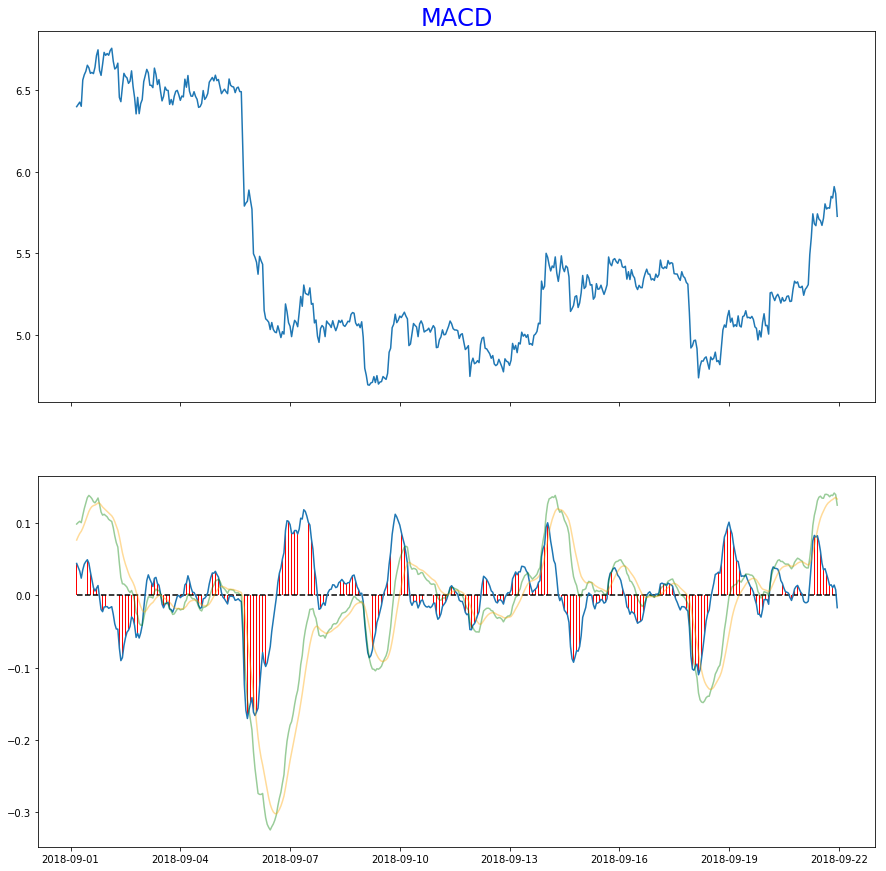

In [9]:
# 因子描述：平滑异同移动平均线(Moving Average Convergence Divergence) , 又称移动平均聚散指标。

# 1. DIFF (Difference)为收盘价短期长期指数平滑移动平均线间的差: DIFF = EMA(close, 12) - EMA(close, 26)。
# 2. DEA为(Difference Exponential Average) DIFF的M日指数移动平均： DEA= EMA(DIFF, M) , 通常M = 9。
# 3. MACO为DIFF和DEA之差，按照国内的处理标准，最终结果乘以2

MACD = dv1H.get_ts('MACD_J', date_type='datetime')
Diff = dv1H.get_ts('Diff_J', date_type='datetime')
Dea = dv1H.get_ts('Dea_J', date_type='datetime')
Hist = dv1H.get_ts('Hist',date_type = 'datetime')

# MACD蓝线
# Diff绿线
# Dea黄线
# Hist红柱
Plot_Macd(dv1H, MACD.iloc[:,0],Diff.iloc[:,0], Dea.iloc[:,0],Hist.iloc[:,0], n=-500)

In [19]:
#------------------- ------2.Stoch RSI ----------------------

# /*
# LC : REF(CLOSE,1); //REF(C,1) 上一周期的收盘价
# RSI: SMA(MAX(CLOSE-LC,0),N,1)/SMA(ABS(CLOSE-LC),N,1) *100;
# ％K: MA(RSI-LLV(RSI,M),P1)/MA(HHV(RSI,M)-LLV(RSI,M),P1)*100;  LLV（l,60）表示：检索60天内的最低价，可适应于检索任何股票
# ％D: MA(％K,P2);

# LC := REF(CLOSE,1);
# RSI:=SMA(MAX(CLOSE-LC,0),N,1)/SMA(ABS(CLOSE-LC),N,1) *100;
# STOCHRSI:MA(RSI-LLV(RSI,M),P1)/MA(HHV(RSI,M)-LLV(RSI,M),P1)*100;
# */

# %K === STOCHRSI ， %D === MA(3)

dv1H.add_formula('RSI', "Ta('RSI',0,0,0,0,close,0,24)", add_data = True)

def STOCHRSI(RSI,T=14,tK=3):
    lowRSI = RSI.rolling(window=14).min()
    highRSI = RSI.rolling(14).max() 
    StochRSI = 100 * (RSI - lowRSI).rolling(3).mean()/(highRSI - lowRSI).rolling(3).mean()
    return StochRSI
    
StochRSI_K = STOCHRSI(dv1H.get_ts('RSI').dropna(),T=14,tK=3).dropna() 
dv1H.append_df(StochRSI_K,'StochRSI_K')
dv1H.add_formula('StochRSI_D','Ts_Mean(StochRSI_K,3)', add_data=True)

# 一个单独RSI
# 一个多因子组合
# 怎么优化参数

symbol,EOSUSDT:binance
trade_date,
20180601000000,NaN
20180601120000,NaN
20180602000000,NaN
20180602120000,NaN
20180603000000,NaN
20180603120000,NaN
20180604000000,NaN
20180604120000,NaN
20180605000000,NaN


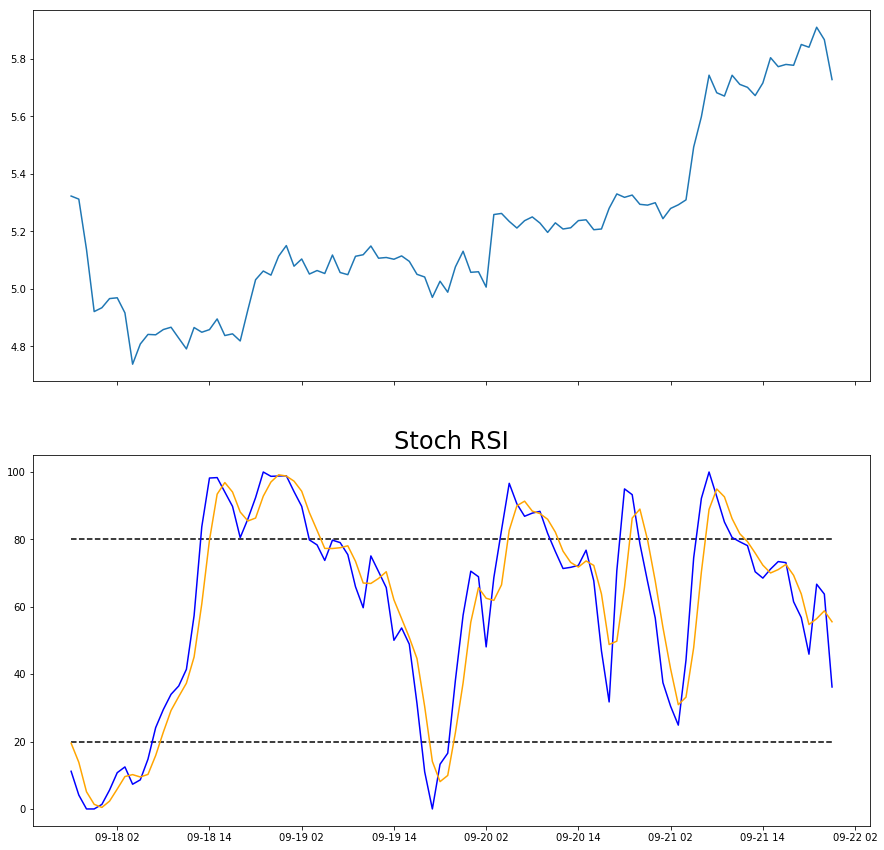

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

start=-100

def Plot_STOCHRSI(dv, StochRSI_K, StochRSI_D, chart_name='Stoch RSI', n=-10):
    fig, (ax1,ax) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax1.plot(dv.get_ts('close', date_type='datetime').iloc[start:,0].iloc[start:])
    ax.set_title(chart_name,fontsize=24) 
    
    ax.plot(StochRSI_K,label = "StochRSI_fastk", color='b')
    ax.plot(StochRSI_D,label = "StochRSI_fastd", color='orange')
    plt.hlines(80, StochRSI_K.index[0], StochRSI_D.index[-1], linestyles='--')
    plt.hlines(20, StochRSI_K.index[0], StochRSI_D.index[-1], linestyles='--')
    ax.xaxis_date()
    plt.show()
    
StochRSI_K = dv1H.get_ts('StochRSI_K',date_type='datetime')
StochRSI_D = dv1H.get_ts('StochRSI_D',date_type='datetime')
Plot_STOCHRSI(dv1H, StochRSI_K.iloc[start:,0], StochRSI_D.iloc[start:,0])

In [20]:
# Delay(x,n)	时间序列函数， n 天前 x 的值
# Ts_Mean(x，n)	时间序列函数，计算 x 中的值在过去n天的平均值
#If(==-2,1,0)

# -----------------1.stoch RSI---------------------------
# 进场信号-----------------------
long = dv1H.add_formula('long',
                        'If((StochRSI_K>StochRSI_D)\
                        &&(Delay(close>open,1))&&(close>open)\
                        &&(RSI<60)\
                        ,2,0)',
                        add_data=True)
short = dv1H.add_formula('short',
                        'If((StochRSI_K<StochRSI_D)\
                        &&(Delay(close,1)<Delay(open,1))&&(close<open)\
                        &&(RSI>40),-2,0)',
                        add_data=True)

# 出场信号-------------------------
close_long = dv1H.add_formula('closeLong',
                        'If(((StochRSI_K<StochRSI_D)&&(Delay(StochRSI_K>=StochRSI_D,1)))\
                        ||(RSI>70)\
                        ,1,0)',
                        add_data=True)
close_short = dv1H.add_formula('closeShort',
                        'If(((StochRSI_K>StochRSI_D)&&(Delay(StochRSI_K<=StochRSI_D,1)))\
                        ||(RSI<30)\
                        ,-1,0)',
                        add_data=True)

# -----------------2.multiple factore---------------------------
# 进场信号-----------------------
long2 = dv1H.add_formula('long2',
                        'If((Delay(Hist,1)<0)&&(Hist>0)\
                        &&((StochRSI_K>StochRSI_D)\
                        &&(Delay(close>open,1))&&(close>open)\
                        &&(RSI<60)),2,0)',add_data=True)
short2 = dv1H.add_formula('short2',
                        'If(((Delay(Hist,1)<0)&&(Hist>0)||(Delay(Dea_J,1)<Delay(Diff_J,1))&&(Dea_J>Diff_J))\
                        &&((StochRSI_K<StochRSI_D)\
                        &&(Delay(close,1)<Delay(open,1))&&(close<open)\
                        &&(RSI>40)),-2,0)',add_data=True)

# 出场信号-------------------------
close_long2 = dv1H.add_formula('closeLong2',
                        'If((Delay(Hist,1)>0)&&(Hist<0)\
                        &&(((StochRSI_K<StochRSI_D)&&(Delay(StochRSI_K>=StochRSI_D,1)))\
                        ||(RSI>70)),1,0)',add_data=True)

close_short2 = dv1H.add_formula('closeShort2',
                        'If(((Delay(Hist,1)>0)&&(Hist<0)||(Delay(Dea_J,1)>Delay(Diff_J,1))&&(Dea_J<Diff_J)\
                        )&&(((StochRSI_K>StochRSI_D)&&(Delay(StochRSI_K<=StochRSI_D,1)))\
                        ||(RSI<30)),-1,0)',add_data=True)


In [19]:
import warnings
warnings.filterwarnings('ignore')

from jaqs_fxdayu.research import TimingDigger

# step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称
tdRSI = TimingDigger(output_folder=".", output_format='pdf',signal_name='stochRSI')
tdMul = TimingDigger(output_folder=".", output_format='pdf',signal_name='multipleFacoter')

# step 2: 通过测试报告，看多空信号的绩效，这里是定义报告格式
def TimingSignal(td, dv, long='long', short='short',closeLong='closeLong', closeShort='closeShort'\
                 , mhp=None,sl=None,sp=None):
    
    #多空信号分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=[dv.get_ts(closeLong)],
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

D:\Anaconda\lib\site-packages\jaqs\research\signaldigger\plotting.py:10: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "D:\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "D:\Anaconda\lib\site-packages\tornado\platform\asyncio.py", line 127, in sta

In [21]:
TimingSignal(tdRSI, dv1H,'long','short','closeLong','closeShort', 100, 0.05, 0.3)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 9%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 10%


In [22]:
tdRSI.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               3.395  -6.061   0.034
p-value              0.007   0.000   0.973
mean                 0.056  -0.060   0.001
std                  0.052   0.030   0.072
info_ratio           1.074  -2.020   0.008
skewness             0.869  -0.569   0.522
kurtosis            -0.847  -0.251  -0.341
pct5                 0.007  -0.108  -0.090
pct25                0.015  -0.074  -0.057
pct50                0.034  -0.057   0.004
pct75                0.088  -0.037   0.034
pct95                0.145  -0.023   0.134
occurance           11.000  10.000  21.000
win_ratio              NaN     NaN   0.524
win_mean/loss_mean     NaN     NaN   0.926


In [23]:
tdRSI.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               2.663  -3.074   1.365
p-value              0.022   0.013   0.187
mean                 0.066  -0.028   0.024
std                  0.083   0.027   0.079
info_ratio           0.803  -1.025   0.298
skewness             1.359  -1.135   1.649
kurtosis             0.165   0.433   2.270
pct5                 0.008  -0.074  -0.053
pct25                0.013  -0.040  -0.018
pct50                0.025  -0.021   0.008
pct75                0.064  -0.006   0.027
pct95                0.236  -0.001   0.226
occurance           12.000  10.000  22.000
win_ratio              NaN     NaN   0.545
win_mean/loss_mean     NaN     NaN   2.388


In [24]:
tdRSI.create_event_report(sig_type="long_short") #同时计算多空头信号的绩效

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               4.117  -5.848   1.041
p-value              0.000   0.000   0.304
mean                 0.061  -0.044   0.012
std                  0.070   0.033   0.077
info_ratio           0.878  -1.342   0.161
skewness             1.437  -0.642   1.178
kurtosis             0.854  -0.299   1.616
pct5                 0.008  -0.093  -0.089
pct25                0.012  -0.060  -0.030
pct50                0.032  -0.038   0.008
pct75                0.088  -0.019   0.033
pct95                0.223  -0.002   0.154
occurance           23.000  20.000  43.000
win_ratio              NaN     NaN   0.535
win_mean/loss_mean     NaN     NaN   1.392


In [43]:
tdMul.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               5.392  -7.947   1.372
p-value              0.000   0.000   0.174
mean                 0.044  -0.028   0.008
std                  0.054   0.023   0.055
info_ratio           0.813  -1.212   0.146
skewness             1.626  -0.414   1.501
kurtosis             1.463  -1.360   2.730
pct5                 0.003  -0.062  -0.059
pct25                0.008  -0.053  -0.019
pct50                0.018  -0.021   0.000
pct75                0.057  -0.005   0.018
pct95                0.167  -0.003   0.144
occurance           45.000  44.000  89.000
win_ratio              NaN     NaN   0.506
win_mean/loss_mean     NaN     NaN   1.538


In [44]:
tdMul.create_event_report(sig_type="long_short") #同时计算多空头信号的绩效

*****-Summary-*****
Event Analysis
                       win    loss      all
t-stat               8.072 -13.244    1.097
p-value              0.000   0.000    0.274
mean                 0.054  -0.034    0.005
std                  0.056   0.024    0.060
info_ratio           0.951  -1.396    0.086
skewness             1.084   0.012    1.251
kurtosis             0.061  -1.668    1.372
pct5                 0.002  -0.064   -0.062
pct25                0.009  -0.057   -0.043
pct50                0.022  -0.036   -0.003
pct75                0.084  -0.009    0.019
pct95                0.174  -0.003    0.130
occurance           73.000  91.000  164.000
win_ratio              NaN     NaN    0.445
win_mean/loss_mean     NaN     NaN    1.591
